In [4]:
# check prophet version
!pip install prophet
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.1.5


In [5]:
# check prophet version
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.1.5


In [6]:
# load the car sales dataset
from pandas import read_csv
# # load data
# #path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv('monthly-museum-sales.csv')
# # summarize shape
# df = read_excel('pengunjung.xlsx')
print(df.shape)
# show first few rows
print(df.tail())

(19, 2)
      Month   Sales
14  2024-01    1733
15  2024-02    2872
16  2024-03     923
17  2024-04     793
18  2024-05    2108


In [7]:
df.columns = ('ds','y')
df.tail()


,ds,y
14,2024-01,1733
15,2024-02,2872
16,2024-03,923
17,2024-04,793
18,2024-05,2108


In [8]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

<Axes: xlabel='ds'>

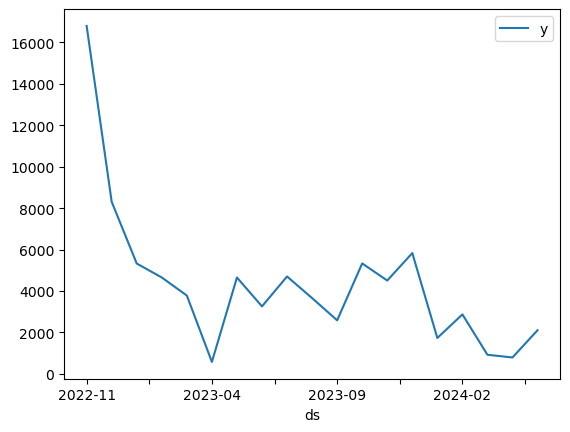

In [9]:
df.plot(x='ds', y='y')

In [10]:
#dari grafik kita ketahui alasan kenapa penelitian ini dilakukan, agar kita tau kenapa grafiknya turun. 
#alasan nya juga karna terjadinya pembayarn museum.

In [11]:
print(df['ds'].unique())
print(df['y'].unique())


['2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05'
 '2023-06' '2023-07' '2023-08' '2023-09' '2023-10' '2023-11' '2023-12'
 '2024-01' '2024-02' '2024-03' '2024-04' '2024-05']
[16796  8305  5327  4653  3781   578  3259  4702  3659  2586  5332  4506
  5833  1733  2872   923   793  2108]


In [12]:
df.dtypes

ds    object
y      int64
dtype: object

In [13]:
import pandas as pd
df['ds'] = pd.to_datetime(df['ds'])
df

,ds,y
0,2022-11-01,16796
1,2022-12-01,8305
2,2023-01-01,5327
3,2023-02-01,4653
4,2023-03-01,3781
5,2023-04-01,578
6,2023-05-01,4653
7,2023-06-01,3259
8,2023-07-01,4702
9,2023-08-01,3659


In [14]:
df.tail()

,ds,y
14,2024-01-01,1733
15,2024-02-01,2872
16,2024-03-01,923
17,2024-04-01,793
18,2024-05-01,2108


In [15]:
m=Prophet( interval_width=0.95, yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False) #menggunakan data bulanan atau tahun mangkanya 
#0.95 karna ini yang paling idel
#fourier itu harmonik 
m.add_seasonality(name='monthly',  period=30.86, fourier_order=2)
model=m.fit(df)

01:29:46 - cmdstanpy - INFO - Chain [1] start processing
01:29:46 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future=m.make_future_dataframe(periods=8, freq='M')
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
22,2024-08-31,104255.145865,-1939.279542,2367.586360,104255.135817,104255.155765,-103910.089416,-103910.089416,-103910.089416,-103910.089416,-103910.089416,-103910.089416,0.0,0.0,0.0,345.056449
23,2024-09-30,103229.636840,4021.138183,8284.801682,103229.623422,103229.650533,-97107.928482,-97107.928482,-97107.928482,-97107.928482,-97107.928482,-97107.928482,0.0,0.0,0.0,6121.708358
24,2024-10-31,102169.944181,1615.775938,5642.471209,102169.926123,102169.962195,-98531.023873,-98531.023873,-98531.023873,-98531.023873,-98531.023873,-98531.023873,0.0,0.0,0.0,3638.920308
25,2024-11-30,101144.435156,11411.188324,15668.149435,101144.412647,101144.458043,-87533.421533,-87533.421533,-87533.421533,-87533.421533,-87533.421533,-87533.421533,0.0,0.0,0.0,13611.013623
26,2024-12-31,100084.742497,8230.429743,12524.577104,100084.714981,100084.769918,-89707.027932,-89707.027932,-89707.027932,-89707.027932,-89707.027932,-89707.027932,0.0,0.0,0.0,10377.714564


In [17]:
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-11-01,16269.008258,14256.447442,18276.457922
1,2022-12-01,6131.090978,3984.227909,8270.347874
2,2023-01-01,6137.248925,3955.133057,8287.439698
3,2023-02-01,6298.872699,4097.755600,8399.129657
4,2023-03-01,3346.184788,1162.825812,5517.588416
5,2023-04-01,1675.142193,-348.940165,3879.357443
6,2023-05-01,4643.999611,2375.603791,6811.977743
7,2023-06-01,2915.882486,798.796048,4877.666367
8,2023-07-01,5807.292730,3805.039586,8024.271613
9,2023-08-01,4155.649645,1913.367614,6433.523079


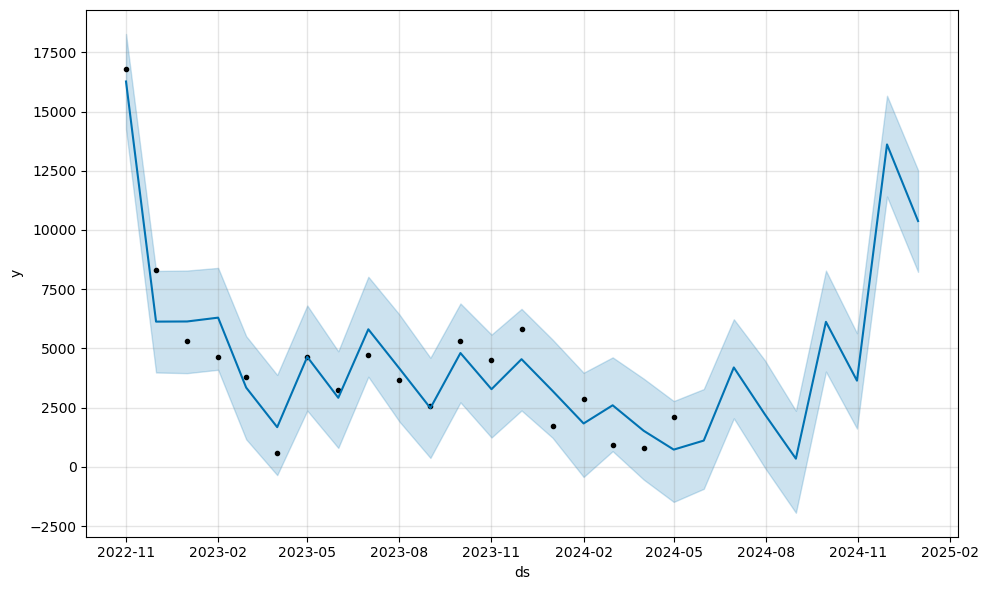

In [18]:
plot = m.plot(forecast)

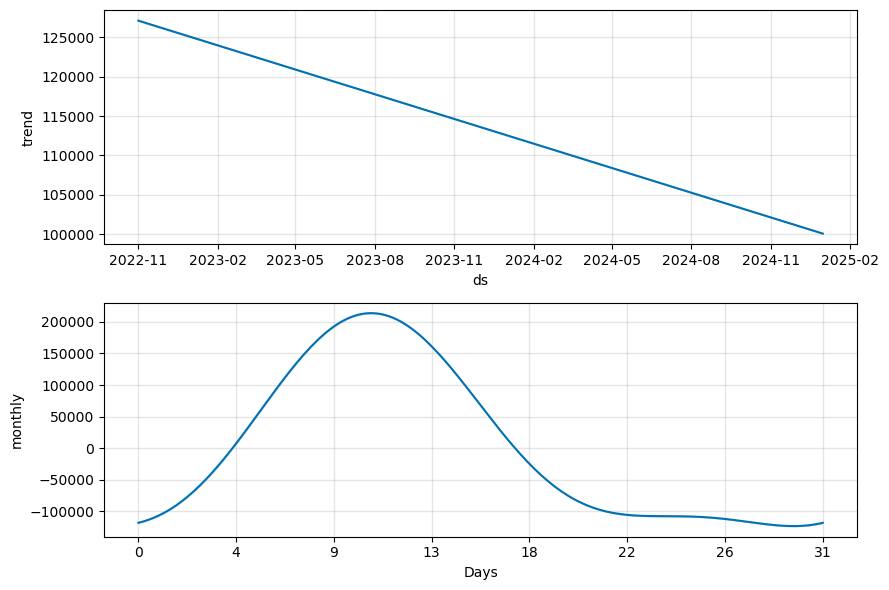

In [19]:
plot2=model.plot_components(forecast)

# Predict
forecast = model.predict(future) 

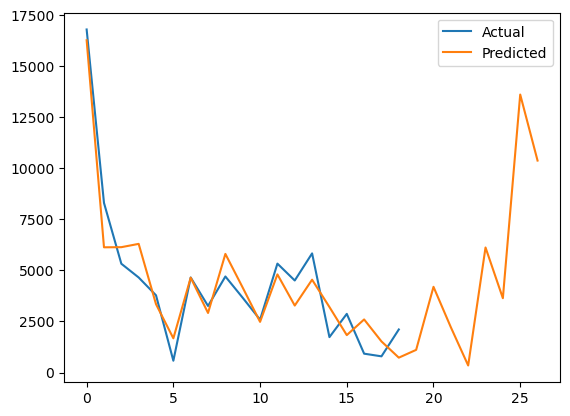

In [20]:
from matplotlib import pyplot
import math
y_true = df['y'].values
y_pred = forecast['yhat'].values
y_actual = y_true
y_predicted = y_pred
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [21]:
import datetime

# Tanggal mulai data
start_date = datetime.datetime.strptime("14/11/2022", "%d/%m/%Y")

# Tambahkan 450 hari
initial_period = datetime.timedelta(days=450)
initial_date = start_date + initial_period

initial_date


datetime.datetime(2024, 2, 7, 0, 0)

In [22]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Tanggal mulai data
start_date = datetime.strptime("14/11/2022", "%d/%m/%Y")

# Tambahkan 3 bulan
initial_period = relativedelta(months=20)
initial_date = start_date + initial_period

# Konversi kembali ke string
result = initial_date.strftime("%d/%m/%Y")
print(result)


14/07/2024


In [36]:
from prophet.diagnostics import cross_validation, performance_metrics

# Melakukan cross-validation pada model Prophet
# initial, period, dan horizon bisa disesuaikan sesuai kebutuhan
df_cv = cross_validation(m, initial='190 days', period='30.86 days', horizon='320 days')

# Menghitung metrik kinerja dari hasil cross-validation
df_p = performance_metrics(df_cv)

# Menampilkan hasil kinerja
print(df_p)


  0%|          | 0/2 [00:00<?, ?it/s]

02:13:25 - cmdstanpy - INFO - Chain [1] start processing
02:13:25 - cmdstanpy - INFO - Chain [1] done processing
02:13:25 - cmdstanpy - INFO - Chain [1] start processing
02:13:25 - cmdstanpy - INFO - Chain [1] done processing


             horizon           mse         rmse          mae      mape  \
0   15 days 20:38:24  8.297001e+06  2880.451554  2848.462884  0.719758   
1   45 days 20:38:24  3.922146e+06  1980.440862  1914.829165  0.521197   
2   46 days 00:00:00  1.310924e+06  1144.956041  1103.316838  0.258817   
3   76 days 20:38:24  1.338762e+06  1157.048680  1113.124975  0.304216   
4   77 days 00:00:00  2.380139e+06  1542.769855  1538.847179  0.514051   
5  107 days 00:00:00  2.579327e+06  1606.028254  1605.443085  0.465275   
6  107 days 20:38:24  1.017940e+07  3190.516660  2897.568238  0.964937   
7  137 days 20:38:24  1.024788e+07  3201.230826  2919.189018  0.968992   
8  138 days 00:00:00  1.860094e+06  1363.852565  1337.243957  0.269174   
9  168 days 00:00:00  3.945533e+06  1986.336640  1833.420246  0.341308   
10 168 days 20:38:24  1.398363e+07  3739.469469  3602.063283  0.733817   
11 198 days 20:38:24  1.158739e+07  3404.025147  3002.413603  0.631014   
12 199 days 00:00:00  7.069912e+06  26

In [34]:
from prophet.diagnostics import cross_validation, performance_metrics

# Melakukan cross-validation pada model Prophet
# initial, period, dan horizon bisa disesuaikan sesuai kebutuhan
df_cv = cross_validation(m, initial='190 days', period='30.86 days', horizon='60 days')

# Menghitung metrik kinerja dari hasil cross-validation
df_p = performance_metrics(df_cv)

# Mengambil nilai MSE, RMSE, MAE, dan MAPE dari dataframe
mse = df_p.loc[df_p['horizon'] == '60 days 00:00:00', 'mse'].values[0]
rmse = df_p.loc[df_p['horizon'] == '60 days 00:00:00', 'rmse'].values[0]
mae = df_p.loc[df_p['horizon'] == '60 days 00:00:00', 'mae'].values[0]
mape = df_p.loc[df_p['horizon'] == '60 days 00:00:00', 'mape'].values[0]

# Menampilkan hasil kinerja
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

  0%|          | 0/10 [00:00<?, ?it/s]

01:41:23 - cmdstanpy - INFO - Chain [1] start processing
01:41:23 - cmdstanpy - INFO - Chain [1] done processing
01:41:24 - cmdstanpy - INFO - Chain [1] start processing
01:41:24 - cmdstanpy - INFO - Chain [1] done processing
01:41:24 - cmdstanpy - INFO - Chain [1] start processing
01:41:24 - cmdstanpy - INFO - Chain [1] done processing
01:41:24 - cmdstanpy - INFO - Chain [1] start processing
01:41:24 - cmdstanpy - INFO - Chain [1] done processing
01:41:25 - cmdstanpy - INFO - Chain [1] start processing
01:41:25 - cmdstanpy - INFO - Chain [1] done processing
01:41:25 - cmdstanpy - INFO - Chain [1] start processing
01:41:25 - cmdstanpy - INFO - Chain [1] done processing
01:41:25 - cmdstanpy - INFO - Chain [1] start processing
01:41:25 - cmdstanpy - INFO - Chain [1] done processing
01:41:26 - cmdstanpy - INFO - Chain [1] start processing
01:41:26 - cmdstanpy - INFO - Chain [1] done processing
01:41:26 - cmdstanpy - INFO - Chain [1] start processing
01:41:26 - cmdstanpy - INFO - Chain [1]

MSE: 32002773.753734842
RMSE: 5657.099411689249
MAE: 5269.576007553858
MAPE: 2.3589833391661754


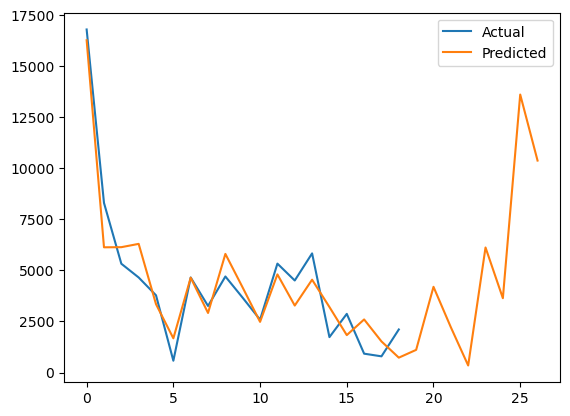

In [25]:
from matplotlib import pyplot
import math

y_pred = forecast['yhat'].values
y_actual = y_true
y_predicted = y_pred
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()